# Reflection of particles from a cylindrical wall

Let us consider that a particle from the starting position $r_0 = (x_0, y_0)$, in time $\Delta t$, moving with velocity $v = (v_x, v_y)$, crosses the boundary of the circle of radius $R$ in one time step $\Delta t$. If there is no boundary the particle will reach to point $r_e$.

First step in calculating the reflection is to find the point where the particle and the wall touch. If we define this point as $r_T$ ($|r_T| = R$), and the time of impact $T = \Delta t \cdot \tau$ we have the following equation:

\begin{equation*}
(x_0 + v_x T)^2 + (y_0 + v_y T)^2 = R^2.
\end{equation*}

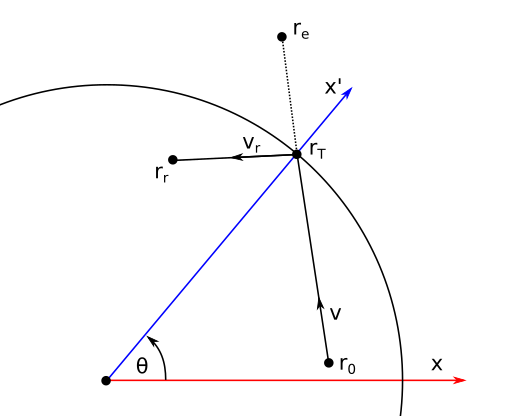

In [2]:
from IPython.display import Image
Image(filename='./cylindrical_reflection.png')

If we solve the quadratic equation for T we get:

$$
\begin{align*}
& (v_x^2 + v_y^2)T^2 + 2(x_0v_x + y_0v_y)T + x_0^2 + y_0^2 - R^2 = 0, \\
\\
& T = \frac{-b + \sqrt{b^2 - 4ac} }{2a} \, \Rightarrow \, \tau = T/\Delta t.
\end{align*}
$$

The particle moves from $r_0$ to the point of impact $r_T$, and reflects reaching $r_r$ in time $\Delta t$. Since the particle reaches the boundary in time less than $\Delta t$ we have $0 < \tau < 1$. If the boundary didn't existed, the particle would reach $r_e$.

In order to get the final position under reflection we first rotate the coordinate system so that $r_T = (x_T, y_T)$ in the transformed system is $r'_T = (x'_T, y'_T) = (R, 0)$. The rotation is performed for angle $-\theta$ and the rotation cosine and sine can be expressed as:

$$
\begin{align*}
cos(\theta) &= \frac{x_T}{R} = C, \\
\\
sin(\theta) &= \frac{y_T}{R} = S. \\
\end{align*}
$$


Where the rotation matrices for a negative and positive angle rotations are:

$$
\begin{align*}
\begin{bmatrix} x' \\ y' \end{bmatrix} &= 
\begin{bmatrix} C & S \\ -S & C \end{bmatrix}\cdot\begin{bmatrix} x \\ y \end{bmatrix}
\\ \\
\begin{bmatrix} x \\ y \end{bmatrix} &= 
\begin{bmatrix} C & -S \\ S & C \end{bmatrix}\cdot\begin{bmatrix} x' \\ y' \end{bmatrix}
\end{align*}
$$

#### Calculation of velocity and position after reflection

Calculation of $r_r$ is performed by simple push from the point of reflection ($r_T$), with velocity $v_r$ (velocity after reflection), during time $\Delta t (1 - \tau)$.

We calculate the velocity after reflection in the rotated coordinate system ($v'_r$), since it is easily calculated as a simple inversion of the $v'_x$ component.

$$
\begin{align*}
v'_r = 
\begin{bmatrix} v'_x \\ v'_y \end{bmatrix}_{\text{after reflection}} = 
\begin{bmatrix} - v'_x \\ v'_y \end{bmatrix}_{\text{before reflection}}
\end{align*}
$$

Which gives the following velocity vector in the original coordinate system:

$$
\begin{align*}
v_r = 
\begin{bmatrix} v_x \\ v_y \end{bmatrix}_{\text{after reflection}} = 
\begin{bmatrix} - C v'_x - S v'_y \\ - S v'_x + C v'_y \end{bmatrix}_{\text{before reflection}}
\end{align*}
$$

Now we can directly calculate $r_r$ in the original coordinate system.

$$
\begin{align*}
r_r = \left(v \cdot \tau + v_r \cdot (1 - \tau)\right)\Delta t
\end{align*}
$$

#### Check for multiple reflection

At this point we have new location $r_r$ which can be outside the cylindrical boundaries. In this case we repeat the same steps as above. The difference is that we have the initial position at $r_T$, with veloctiy vector $v_r$, and timestep set to $\Delta t_{new} = (1 - \tau)\Delta t$. The algorithm is repeated as many times as needed - until the $r_r$ stays inside the geometry.